1 Supervised classification and decision boundaries
-------------------
In this session, you will be working with **supervised** classification, where you have **labelled** classes in your dataset to *inform* your model how the classification should be. It means that you can be able to first *train* your classifier based upon part of the **labelled** data points, and also *test* your model by using the rest part of the **labelled** data points. Thus the entire procedure of classification is in a sense *supervised* by the class **labels**.

An important transition from the **unsupervised** classification to the **supervised** one is that the implicit distance measurements for clustering becomes explicit delineation of **decision regions**, whose boundaries are called **decision boundaries**. Thus **supervised** classification leads to mathematical derivation of **decision boundaries**, which can be either linear or non-linear. This is achieved through the procedure of model training.

To keep the learning curve less steep, you will only be looking at **linear** classifiers in this session and starting with dummy dataset in low dimension feature space. You will first try to use the **linear discriminant** function for binary classification, where you will be seeking an optimal linear combination of the features that best separates the classes while minimizing the within class variance. Intuitively, in a *D* dimensional feature space, all your **labelled** data points can also be treated as in a *D+1* dimensional space with the class **labels** as the additional dimension. It turned out that if the **labels** are used as dependent variable in the *D+1* space, finding the best **decision boundary** in the *D* dimensional feature space is equivalent to **least squares** data fitting in the *D+1* dimensional space with class labels.

Sometimes, you may also want the **decision boundary** to be less rigid especially when the **labels** indicate that the data points are not clearly separable by a solid boundary. This is the reason you will also deploy a probabilistic version of the **discriminant functions**: the **logistic regression**. It helps you to capture the uncertainties in the classes.

Finally, you will get familiar with a non-probabilistic formalization of classification: the **linear perceptron**, which iteratively approximates the optimal **decision boundary**. Due to its simple formalization, it can be aggregated easily. It forms the foundation of neural network based algorithms.

Similar to the last session, at the closing part, you will experiment with the algorithms on real world dataset.

### 1.0 Simple linear discriminant functions for binary classification

Again with dummy dataset, you will get yourself familiar with the rationale of the **linear discriminant** analysis. In many cases, it has been referred briefly as LDA.

You will start with dummy dataset in 2-dimension.

In [2]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

In [21]:
# Start with some dummy data points.
import numpy as np
import matplotlib.pyplot as plt

# You can define a function to create your dummy dataset.
def dummyData(add_outliers=False, add_class=False):
    x0 = np.random.randn(50, 2) * 0.7 + np.array([2.0, 0.0])
    x1 = np.random.randn(50, 2) * 0.5 + np.array([0.0, -1.0])
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(len(x0)), np.ones(len(x1))]).astype(np.int)

# Then, try to call the function to create some data.
x_train, y_train = dummyData()

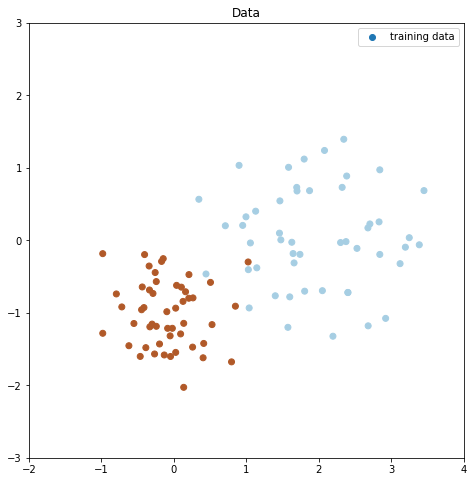

In [22]:
# Visualize the dummy dataset.

plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()

In [23]:
# Define functions for training/fitting the model to the labelled training data.

import functools
import itertools

# In this example, the labelled classes are represented in the One-Hot Encoding manner. Try to figure out what does it mean.
def encode(y):
    """
    Encode class index into one-of-k code
    Parameters
    ----------
    class_indices : (N,) np.ndarray
        non-negative class index
        elements must be integer in [0, n_classes)
    Returns
    -------
    (N, K) np.ndarray
        one-of-k encoding of input
    """
    n_classes = np.max(y) + 1

    return np.eye(n_classes)[y]

# Function for training/fitting the model over the training dataset.
def fit(X, y):
    """
    Least squares fitting for classification parameters.
    When y is class labels, least square is equivalent to LDA.
    ----------
    X : (N, D) np.ndarray
        training independent variable
    y : (N,) or (N, K) np.ndarray
        training dependent variable
        in class index (N,) or one-of-k coding (N,K)
    """
    if y.ndim == 1:
        y = encode(y)
    W = np.linalg.pinv(X) @ y
    return W

# Function making prediction/classification.
def classify(X, W):
    """
    Classify input data.
    ----------
    X : (N, D) np.ndarray
        independent variable to be classified
    W : (D,) or (D, K) np.ndarray
    -------
    Return
    (N,) np.ndarray
        class index for each input
    """
    return np.argmax(X @ W, axis=-1)

# Function transform the input features into desgined matrix.
def transform(x, degree):
    # Transforms input array with polynomial features
    # x : (sample_size, n) ndarray
    # Output : (sample_size, 1 + nC1 + ... + nCd) ndarray

    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = []
    for degree in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x * y, items))
    return np.asarray(features).transpose()



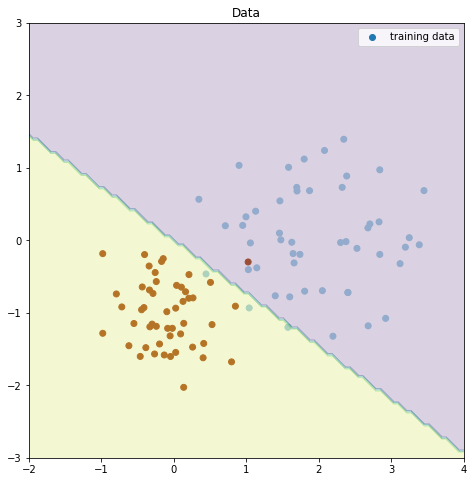

In [24]:
# Train the model by using function fit defined above, and then apply the trained model to predict everywhere in the feature space X.

# The entire feature space.
x1_test, x2_test = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-3, 3, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

X_train = transform(x_train, 1)
X_test = transform(x_test, 1)

weights = fit(X_train, y_train)
y = classify(X_test, weights)


# Visualization
plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 7))
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()


### 1.1 Probabilistic Discriminative Models: Logistic regression

Logistic regression simply add a **activation function** on top of the linear solution to the classification problem, so that to smoothen the solid **decision boundary** produced by the linear solution. Below, you will notice that the largest difference is the **activation function**, which is the *sigmoid* function in this case, added on top of the linear solution to the classification model.

In [25]:
# As what you have already done above, you need to again define functions for training and prediction.

# Activation function.
def sigmoid(a):
    return np.tanh(a * 0.5) * 0.5 + 0.5

# Training the model with the training data.
def fit(X, y, max_iter=100):
    """
    maximum likelihood estimation of logistic regression model
    Parameters
    ----------
    X : (N, D) np.ndarray
        training data independent variable
    t : (N,) np.ndarray
        training data dependent variable
        binary 0 or 1
    max_iter : int, optional
        maximum number of paramter update iteration (the default is 100)
    """
    w = np.zeros(np.size(X, 1))
    for _ in range(max_iter):
        w_prev = np.copy(w)
        y_bar = sigmoid(X @ w)
        grad = X.T @ (y_bar - y)
        hessian = (X.T * y_bar * (1 - y_bar)) @ X
        try:
            w -= np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            break
        if np.allclose(w, w_prev):
            break
    return w

# Apply the activation function to obtain probability.
def proba(X, W):
    """
    compute probability of input belonging class 1
    Parameters
    ----------
    X : (N, D) np.ndarray
        training data independent variable
    Returns
    -------
    (N,) np.ndarray
        probability of positive
    """
    return sigmoid(X @ W)

# Make predictions using the trained model.
def classify(X, W, threshold=0.5):
    """
    classify input data
    Parameters
    ----------
    X : (N, D) np.ndarray
        independent variable to be classified
    threshold : float, optional
        threshold of binary classification (default is 0.5)
    Returns
    -------
    (N,) np.ndarray
        binary class for each input
    """
    return (proba(X, W) > threshold).astype(np.int)

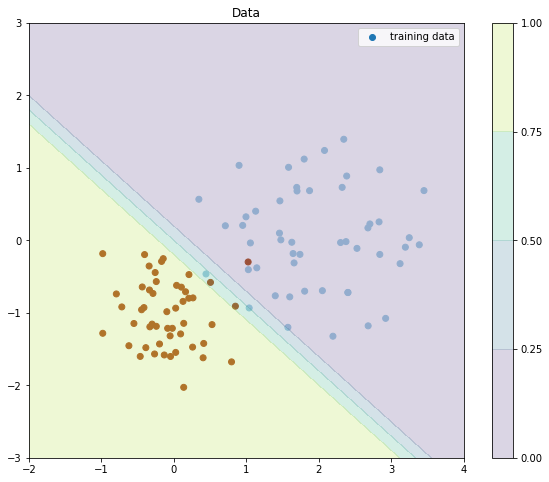

In [26]:
# Now, let's try to train a logistic regression model and predict over the entire feature space.

# Transform the data points into designed matrix.
X_train = transform(x_train, 1)  # Transform the training data
X_test = transform(x_test, 1)  # Transform the test data which contains the entire feature space

weights = fit(X_train, y_train)  # Train the model
y = proba(X_test, weights)  # Probability prediction, 

#in this case, you have not apply the classify function but only to see the probability distribution of the prediction.

# Visualization
plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 5))
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.colorbar()
plt.legend()

### 1.2 A non-statistical perspective: The Perceptron

Instead of fitting/training a model/classifier in terms of the statistics of the entire training dataset, you can also seek your classification **decision boundary** through examining the data points in the dataset individually while updating the parameter of your classifier. This is exactly how **perceptron** achieves classification. In the case of linear models, you start with some random classification line, and update the parameter of this line in a step-wise manner, where in each step, you slightly adjust the line parameter so that the **position** and **orientation** of this line will produce less error in classifying one of the data points in the dataset. After several iteration, this line will approach the optimal **decision boundary** that correctly classifys all the data. **Perceptron** is very important as it forms the fundamentals of the **neural networks**.

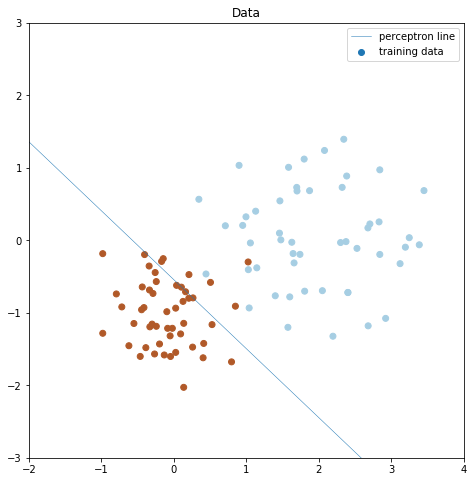

In [31]:
# Similarly, you start to define a series of functions to train/fit your model and make predictions.

# Make a prediction with weights
def predict(point, weights):
    activation = np.dot(point, weights)
    return 1.0 if activation >= 0.0 else -1.0
 
# Estimate Perceptron weights using stochastic gradient descent
# Please try to figure out how the classifier parameters are updated.
def train(x, y, l_rate, n_epoch):
    x = np.c_[np.ones(len(x))*(-1.0), x]
    weights = [0.0 for i in range(x.shape[1])]
    for epoch in range(n_epoch):
        for i, xi in enumerate(x):
            if predict(xi, weights)*y[i] <= 0:
                weights = weights + l_rate*xi*y[i]
    return weights

# Try to experiment with these training parameters.
l_rate = 0.05
n_epoch = 1000

# Training results
weights = train(X_train, np.where(y_train <= 0, -1, 1), l_rate, n_epoch)

# Visualize the decision boundary/line.
# Given the weights, the decision line on the X plane can be defined by the function X*W = 0.
# Then the position of the decision line can be easily determined:
x1 = np.linspace(-3, 15, 200).reshape(-1,1)
x2 = (weights[0]+weights[1]*x1)/(-weights[2])

# Visualization
plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.plot(x1, x2, linewidth=.5, label='perceptron line')
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()


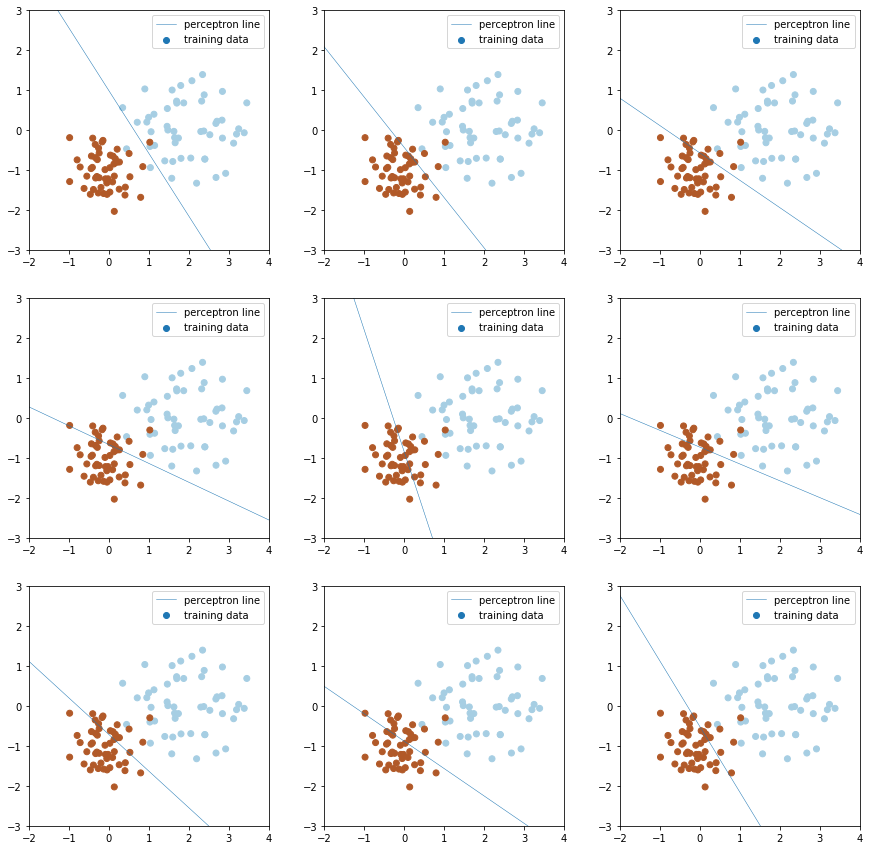

In [33]:
# You can even visualize how model parameters/weights have been updated during some of the epochs.

# But first you need to re-write the training functionality to record trained weights in each epoch.
def train(x, y, l_rate, n_epoch):
    x = np.c_[np.ones(len(x))*(-1.0), x]
    weights_all = []
    weights = [0.0 for i in range(x.shape[1])]
    for epoch in range(n_epoch):
        for i, xi in enumerate(x):
            if predict(xi, weights)*y[i] <= 0:
                weights = weights + l_rate*xi*y[i]
                weights_all.append(weights)
    return weights_all

l_rate = 0.01
n_epoch = 1000
weights_all = train(X_train, y_train*2-1, l_rate, n_epoch)

# Visualization
fig = plt.figure(figsize=(15,15))
for i in range(9):
    x1 = np.linspace(-3, 15, 200).reshape(-1,1)
    x2 = (weights_all[i*10][0]+weights_all[i*10][1]*x1)/(-weights_all[i*10][2])
    plt.subplot(3, 3, i+1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
    plt.plot(x1, x2, linewidth=.5, label='perceptron line')
    plt.axis([-2, 4, -3, 3])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

In [35]:
# So far, you have only been working with training data.
# In machine learning, you also need to find a way to evaluate your model.
# Normally, a handy way to evaluate your model is to split your dataset into training and test sets, pretending like you have extra data to verify the performance of the trained model.

# You can define a function to split the dataset at hand.
def trainTestSplit(x, y):
    data = np.c_[x, y]
    np.random.shuffle(data)
    x_train = data[:int(0.7*len(data)), :2]  # 70% of data for training
    x_test = data[int(0.7*len(data)):, :2]  # 30% for testing
    y_train = data[:int(0.7*len(data)), 2:]  # 70% of data for training
    y_test = data[int(0.7*len(data)):, 2:]  # 30% for testing
    return x_train, y_train, x_test, y_test

# Apply the function to your data.
X_train, Y_train, X_test, Y_test = trainTestSplit(x_train, y_train)


In [36]:
# Now, you can define another function to evaluate the model performance on the test dataset.
def accuracy(x_test, y_test, w):
    y_test = y_test.reshape((-1,))
    y_test = y_test*2-1
    x_test = np.c_[np.ones(len(x_test))*(-1.0), x_test]
    y_pred = []
    for i, xi in enumerate(x_test):
        y_pred.append(predict(xi, w))
    correct = 0
    for i in range(len(y_pred)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_test)) * 100.0

# Call and apply the function.

acc = accuracy(X_test, Y_test, weights)
print(acc)

93.33333333333333


### 1.3 Using existing Python packages and modules.

Again, like the K-means, you don't have to implement the linear classifiers step-by-step as shown above. After walking through the rationale of the classifiers, you can safely make your own choice regarding the types of classifiers by directly call classifier functionalities within the Python *Sklearn* module.

In [40]:
# Introducing Python modules and packages
# Here is a example of applying the linear perceptron from the sklearn module.
# Please also try to call and experiment with other linear models within the sklearn.linear_model module, such as the LogisticRegression.

import numpy as np
from sklearn.linear_model import LogisticRegression, Perceptron

# These are sample codes for the LogisticRegression.
#log = LogisticRegression(C=1e5)
#log.fit(X_train, Y_train)

# These are sample codes for the Perceptron.
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train, Y_train)
weights, bias = percep.coef_, percep.intercept_

# How does the result look like compared to the one produced by the model implemented step-by-step shown above?
# What is the potential reason leading to the difference?
print(percep.score(X_test, Y_test)*100)

96.66666666666667


C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


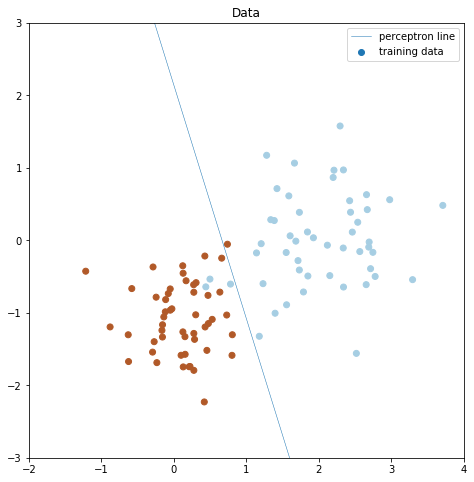

In [13]:
# Draw the final decision boundary/line.
x1 = np.linspace(-3, 15, 200).reshape(-1,1)
x2 = (bias+weights[0,0]*x1)/(-weights[0,1])

# Visualization
plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.plot(x1, x2, linewidth=.5, label='perceptron line')
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()

### 1.4 From binary to multiclass classification

So far you have been worked with **binary** classification, where only two classes have been involved. In many cases, you also have to classify multiple classes. How to do **multiclass** classification? One simple approach is to generalize the **binary** classification approach to **multiclass** classification. You can treat one of the multiple classes and the rest of the other classes as **binary**! Then, each time you just apply a **binary** classification to classify one class out of the other. This is named as **one-versus-rest** approach. The *sklearn* has already implemented this for you. Actually the *sklearn* has implemented many options for multiclass classification task. In this section, you are going to experiment few of them.

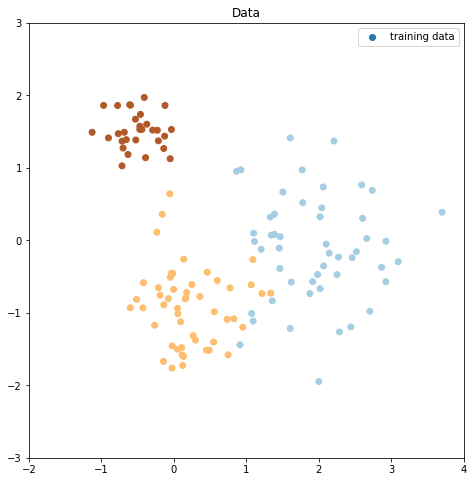

In [7]:
# First, let's generate some dummy dataset contains more than two classes, and then visualize the data points.
# We still stay in the 2-dimensional feature space.

import numpy as np
import matplotlib.pyplot as plt

# You can define a function to create your dummy dataset.
def dummyData(add_outliers=False, add_class=False):
    x0 = np.random.randn(50, 2) * 0.7 + np.array([2.0, 0.0])
    x1 = np.random.randn(50, 2) * 0.5 + np.array([0.0, -1.0])
    x2 = np.random.randn(30, 2) * 0.3 + np.array([-0.5, 1.5])
    return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(len(x0)), np.ones(len(x1)), np.ones(len(x2))*2]).astype(np.int)

# Then, try to call the function to create some data.
x_train, y_train = dummyData()

# Visualization
plt.figure(figsize=(10,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()

C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'label'


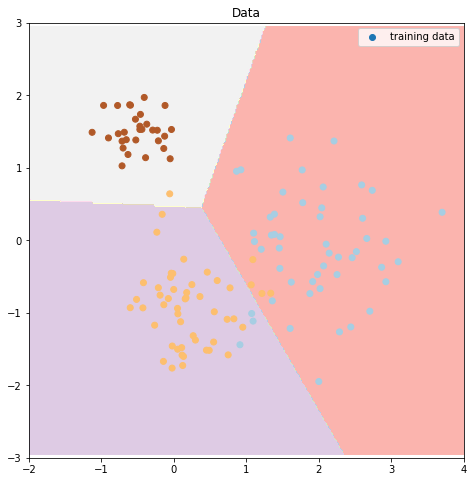

In [13]:
# Apply the 'one-versus-rest' Logistic Regression from the sklearn module

from sklearn.linear_model import LogisticRegression

# Using the 'one-versus-rest' (OVR)
# Please refer to the online sklearn documentation to figure out what are the other options for multiclass Logistic Regression.
logreg = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class='ovr').fit(x_train, y_train)

# Print the training scores
#print("training score : %.3f (%s)" % (logreg.score(x_train, y_train), multi_class))

# Create a mesh to plot the decision regions and boundaries
h = .02  # step size in the mesh
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# Point in the mesh [x_min, x_max]x[y_min, y_max].
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Visualization

plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap='Pastel1', label='training data')  # levels=np.linspace(0, 1, 5)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.axis([-2, 4, -3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Data')
plt.legend()


In [ ]:
# After experiment with option(s) other than the 'OVR', did you notice some difference? If yes, what are the reasons?
# Also please experiment with different training parameters to see how things can be different.
# Try to split the dataset into training and test datasets, and inspect your model performance.

### 1.5 Supervised classification on real world GIS and Remote Sensing datasets.

This section adopts the same dataset as you have already worked in the last session about the unsupervised classification. You will first try to apply your knowledge of supervised classification to the sample dataset, where you can train and test your classification models. Then, you can experiment further with models by applying them to larger areas, or even the area covered by the entire image. Although you will not be able to validate your model performance over the large areas, please do try to understand how the models perform differently and the potential reasons causing the differences. 

In [ ]:
# Before reading the data we need to first clone the data on Github to our Colab workspace
!git clone https://github.com/jonwangio/uu_ml

     id   land_cover  class                                           geometry
0  None  Clear water     11  POLYGON ((638038.588 5776433.484, 637916.087 5...
1  None  Clear water     11  POLYGON ((638293.014 5776226.174, 638669.940 5...
2  None  Clear water     11  POLYGON ((642646.516 5779109.663, 643438.062 5...
3  None  Clear water     11  POLYGON ((658307.816 5795505.970, 659438.596 5...
4  None  Clear water     11  POLYGON ((617048.489 5789668.319, 617764.649 5...


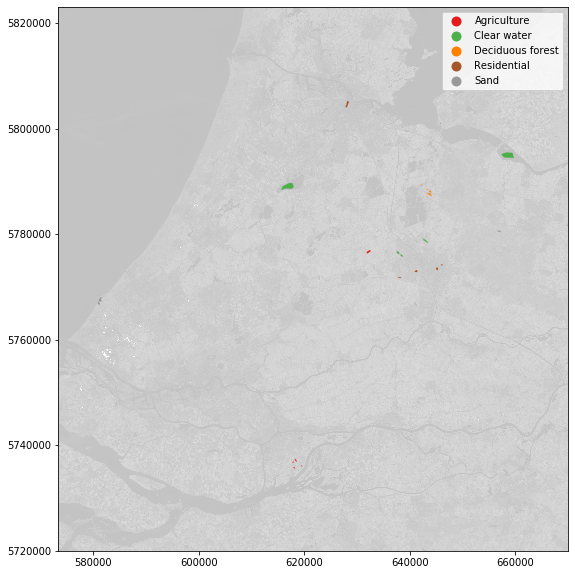

In [14]:
# Same dataset as already shown in the session of unsupervised classification.
# The dataset is extracted by using the sampling polygon containing few land use and land cover types.

import matplotlib.pyplot as plt
import numpy as np
% pip install geopandas
import geopandas as gpd
% pip install rasterio
import rasterio
from rasterio.plot import show
from sklearn import cluster

# The data contains sample LULC areas around dutch provinces North Holland and Utrecht.
aoi = gpd.read_file('uu_ml/data/aoi_NL_5_classes.shp')
print (aoi.head())

# Below is a visualization of the sample LULC areas superimposed on a satellite image of part of the Netherlands
file_location = 'uu_ml/data/b5_2015.TIF'
b5_2020 = rasterio.open(file_location, nodata=0)

fig,ax = plt.subplots(1,1, figsize=(10,10))
show(b5_2020, ax=ax, cmap='gray', alpha=0.25)
aoi.plot(column='land_cover', legend=True, ax=ax, cmap='Set1')


In [50]:
# All the extracted LULC data is already organized in the format of pandas dataframe.
# You can read them from a prepared *.csv file.

import pandas as pd
import numpy as np

# Read the data in 
lulc = pd.read_csv('uu_ml/data/stack_aoi_2015.csv')

# Extract columns of bands as features and LULC types.
# Please do experiment with other band combinations.
data = np.c_[np.c_[lulc['B5'].values, lulc['B6'].values], lulc['aoi'].values.astype(int)]
np.random.shuffle(data)

In [43]:
# Prepare some training and test datasets from the LULC data.

# Recall our function for preparing training and test datasets.
# This time we re-write it a little bit to let the users of the function to split the data into training and test sets.

def trainTestSplit(x, y, training_proportion):
    data = np.c_[x, y]
    np.random.shuffle(data)
    x_train = data[:int(training_proportion*len(data)), :2]  # 70% of data for training
    x_test = data[int(training_proportion*len(data)):, :2]  # 30% for testing
    y_train = data[:int(training_proportion*len(data)), 2:]  # 70% of data for training
    y_test = data[int(training_proportion*len(data)):, 2:]  # 30% for testing
    return x_train, y_train, x_test, y_test

# This time, use a very small proportion of the data for training, say, 30%.
X_train, Y_train, X_test, Y_test = trainTestSplit(data[:,:-1], data[:,-1], 0.3)

# You can also try to visualize how the data looks like in the feature space.

In [49]:
# Now apply the sklearn linear perceptron to see how a small fraction of the dataset can resemble the pattern of all the data.

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train, Y_train)
weights, bias = percep.coef_, percep.intercept_

# How about the performance of the classifier over the test dataset?
# Try to experiment with different proportions of the dataset for training and testing.
print(percep.score(X_test, Y_test)*100)

76.0039827414537


C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Would it be possible to use the dataset above to predict the pattern of the entire image?
# Well, the dataset extracted within the polygons seems too small to resemble the patterns in the entire image. But still, let's try.

# Subset for plotting speed
lulc_sub = lulc.sample(n=5000)
lulc_sub.head()

Unnamed: 0    B1    B2    B3    B4     B5     B6     B7   aoi
4457     3666935  7265  7405  7693  7457   7656   7551   7532  11.0
1500     2998364  7914  7944  8088  7838   8024   7409   7349  11.0
2308     3033823  7903  7945  8083  7890   7711   7414   7383  11.0
3615     3628282  7277  7418  7721  7483   7668   7591   7559  11.0
6602     4994505  8376  8354  9655  8399  24530  14060  10071  52.0

In [16]:
# Prepare training data

# You need some modules to read image data and organize the data for training.
import numpy as np
from matplotlib.pyplot import imread
from sklearn.preprocessing import LabelBinarizer

X_train = np.c_[lulc_sub['B5'].values, lulc_sub['B6'].values]
Y_train = lulc_sub['aoi'].values.astype(int)

#Y_dense = LabelBinarizer().fit_transform(Y_train)

file_list = ['uu_ml/data/b5_2015.TIF', 'uu_ml/data/b6_2015.TIF']  # List to store file names

# You can print to see how the file_list looks like
print(file_list)

# Read the files and stack them together by calling their names
# Use the 'for' loop to iterate over the names to read files
stack = np.array([])  # Empty array to store the stacked images
for file in file_list:
    img = imread(file)  # Read each image file
    print(img.shape)  # Each time, also check the size of the image
    
    # In order to do clustering, image should be reshaped into a single column
    img_col = img.reshape(-1, 1)
    
    # Each time put the reshaped image into the stack
    stack = np.hstack((stack,img_col)) if stack.size else img_col
    # Also to check the size of the stack
    print(stack.shape)

['data/b5_2015.TIF', 'data/b6_2015.TIF']


C:\Users\Jon\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


(3434, 3221)
(11060914, 1)
(3434, 3221)
(11060914, 2)


In [17]:
# Train and predict on entire image
# This time, let's try the LogisticRegression first and please DO experiment with other classifiers.
from sklearn.linear_model import LogisticRegression

# It is not binary classification anymore.
# To achieve the multi-class classification, you can each time classify each class out of the rest of the data.
# This is called the 'one-versus-rest' or 'one-versus-all' (OVR) classification scheme.
log = LogisticRegression(multi_class='ovr')
Y_pred = log.fit(X_train, Y_train).predict(stack)


C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Map the predicted categories to original classes 

aoi['aoi_cat'] = pd.Categorical(aoi['class'])
classes = aoi.loc[:,['land_cover', 'aoi_cat']].drop_duplicates()
class_dict = {k:v for k,v in zip(classes.aoi_cat, classes.land_cover)}

#Y_pred_categ = np.array([class_dict[y] for y in Y_pred])

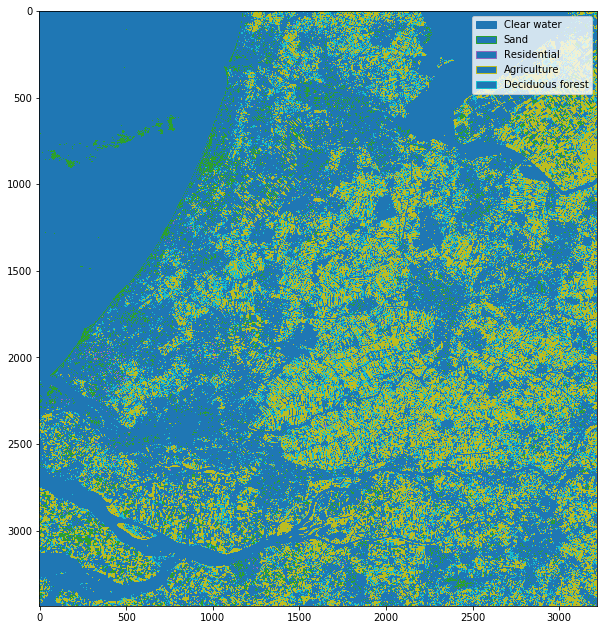

In [19]:
# Visualize the classification results.

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

row, col = img.shape  # Get the original dimensions of the image

# You may also want to plot the image with larger size for detailed inspection. Please feel free to adjust the plotting parameters.
plt.figure(figsize = (10,12))
im = plt.imshow(Y_pred.reshape(row, col), cmap='tab10')
# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(im.cmap(im.norm(key)), label=class_dict[key]) for key in class_dict]
# put those patched as legend-handles into the legend
plt.legend(handles=patches)  #, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Notice the LULC represented in the colored edge of the legend patches.

In [ ]:
# Does the result makes sense to you?
# What are the problems you have identified?
# What is the implication of using samll training dataset for predicting very large dataset?
# Please experiment with more classifiers.